# Edge Detection

A special case of using convolution operation to extract some information about an image is detecting the edges present in the image. **But why is edge detection important?** To answer this question we need to understand what is an edge.

**Answer**: An edge is a boundary seperating two heterogeneous areas. The heterogeneity of the regions can be based on some criterion set by the user. There can be different types of edges based on the heterogeneity criteria, viz:

- Intensity Edge
- Colour Edge
- Texture Edge

<br/>

<figure>
    <img src="../assets/drawings/edges.jpg" width = 600px/>
    <figcaption style = "text-align:center">3 Types of Edges based on Different Heterogeneity Criterion</figcaption>
</figure>

<br/>

Let's take the simple case of intensity edge to understand what does edge detection mean a bit mathematically. Let's plot the intensity curve of the left most image with respect to the horizontal direction and see how the curve looks like.

In [1]:
# Importing libraries

import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
from utils import image_utils as utils

## What is Edge Detection

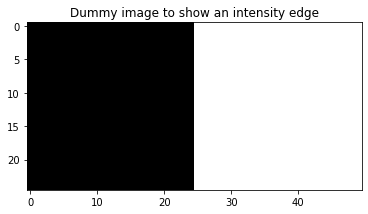

In [2]:
# Creating dummy matrix and showing it as an image

mat = np.zeros((25, 50))
mat[:, 25:] = 1

plt.imshow(mat, cmap = 'gray')
plt.title('Dummy image to show an intensity edge')
plt.show()

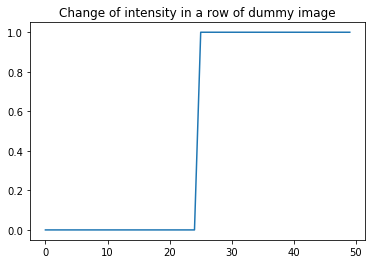

In [3]:
# Plotting the intensity levels of a single row from the image

plt.plot(mat[1, :])
plt.title('Change of intensity in a row of dummy image')
plt.show()

So we see that an intensity edge is infact a sharp/fast change in intensity levels in an image.**How can we detect it?** How about using some basic calculus. Basically to observe change in a signal we can use differentiation operation.

A simple differentiation of this curve should give us the position of the edge. Let's see that.

As an image is a discrete signal. **We will use a discrete form of differentiation.** Let's use numpy's [diff](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) operation as a discrete differentiator.

In [4]:
from numpy import diff

In [5]:
dx = 1
mat_prime = diff(mat[1, :])/dx

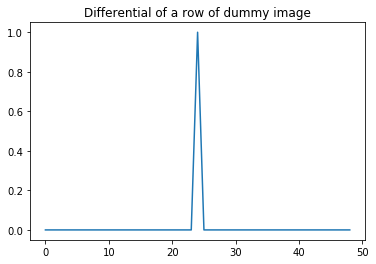

In [6]:
plt.plot(mat_prime)
plt.title('Differential of a row of dummy image')
plt.show()

An impulse at the position of the edge clearly gives the location of the edge. The differentiation result is also correct as we know from standard results that the differentiation of the step function gives an impulse function with an impulse at the location of the step.

The differential operation used here is nothing but convolving a 1D filter [-1, 1] on a row of the image. If we pass [-1, 1] through a 1D vector containing zeros and ones (as in the case of the dummy image) we will get an impulse at the position of the image. This can be seen from the code below.

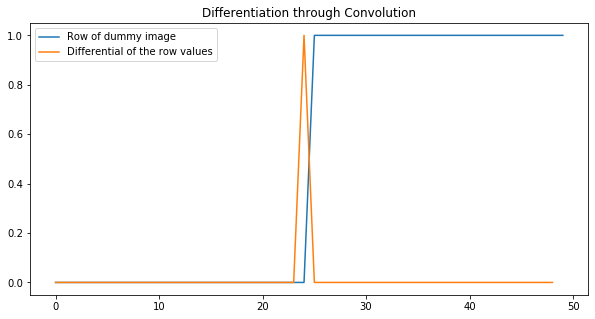

In [7]:
vec = mat[1, :]
kernel = [-1, 1]
new_vec = []
for i in range(len(vec) - len(kernel) + 1):
    op = vec[i]*kernel[0] + vec[i+1]*kernel[1]
    new_vec.append(op)

f, ax = plt.subplots(1, 1, figsize = (10, 5))
plt.plot(vec, label = 'Row of dummy image')
plt.plot(new_vec, label = 'Differential of the row values')
plt.legend()
plt.title('Differentiation through Convolution')
plt.show()

The above case shows differentiation operation as convolution in 1D space. Let's see a similar operation in 2D space. For that we need to create a 2D kernel and perform a 2D convolutional operation. We can do that by OpenCV's [filter2D](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html) operation.

In [8]:
# Importing libraries

import cv2

In [9]:
kernel = np.array([[0, 1], [-1, 0]])
print('2D kernel \n {}'.format(kernel))

2D kernel 
 [[ 0  1]
 [-1  0]]


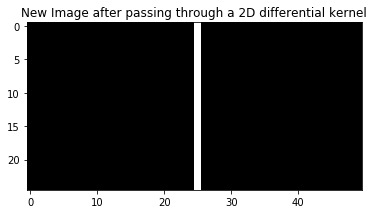

In [10]:
new_img = cv2.filter2D(mat, -1, kernel)

plt.imshow(new_img, cmap = 'gray')
plt.title('New Image after passing through a 2D differential kernel')
plt.show()

The kernel which we just used in the above example is know as [Robert Cross Operator](http://homepages.inf.ed.ac.uk/rbf/HIPR2/roberts.htm). This is one of the most basic kernels used for edge detection. There are other more advanced kernels also like [Prewitt Operator](https://www.cs.auckland.ac.nz/courses%0B/compsci373s1c/PatricesLectures/Prewitt_2up.pdf) and [Sobel Operator](https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm). Let's quickly check them out on a more realistic image.

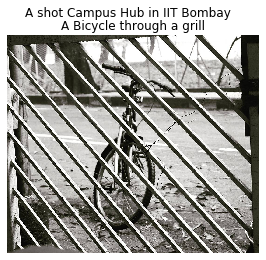

In [11]:
# Reading a sample image

img = cv2.cvtColor(cv2.imread('..//assets//images//bombay-5.jpg'), cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
utils.showImage([img], ['A Bicycle through a grill'], 'A shot Campus Hub in IIT Bombay')

<br/>

<figure>
    <img src="../assets/drawings/prewitt_sobel.jpg" width = 600px/>
    <figcaption style = "text-align:center">Prewitt and Sobel Operator 3X3 Kernels</figcaption>
</figure>

<br/>

The above image shows two 3X3 kernels of Prewitt and Sobel operators. These are two famous operators for edge detection. You can read about them more at the above links. **Let's see them in action and understand how the little difference between them plays out on images.** 

We can apply these operators to images using filter2D function as well as the Sobel function in OpenCV. [OpenCV Gradients](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html)

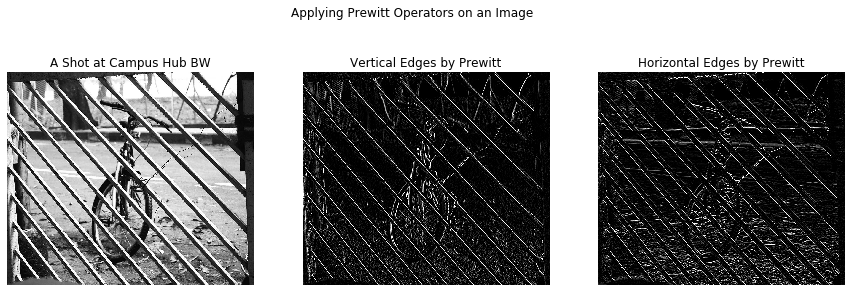

In [12]:
# Prewitt Operator

prewittx = np.array([[-1, 0, 1], [-1, 0, 1],[-1, 0, 1]])
prewitty = np.array([[-1, -1, -1], [0, 0, 0],[1, 1, 1]])
vertical_edge = cv2.filter2D(img_bw, -1, prewittx)
horizontal_edge = cv2.filter2D(img_bw, -1, prewitty)

utils.showImage([img_bw, vertical_edge, horizontal_edge], ['A Shot at Campus Hub BW', 'Vertical Edges by Prewitt', 'Horizontal Edges by Prewitt'],
                'Applying Prewitt Operators on an Image')

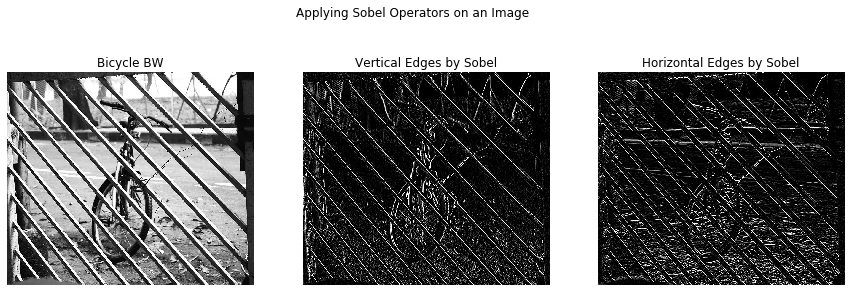

In [13]:
# Sobel Operator

sobelx = np.array([[-1, 0, 1], [-2, 0, 2],[-1, 0, 1]])
sobely = np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]])
vertical_edge = cv2.filter2D(img_bw, -1, sobelx)
horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

utils.showImage([img_bw, vertical_edge, horizontal_edge], ['Bicycle BW', 'Vertical Edges by Sobel', 'Horizontal Edges by Sobel'],
                'Applying Sobel Operators on an Image')

**Observations**:

- The vertical and horizontal images don't look too different than each other. But if you look closely you can see that they are different. The fact that most of the image contains diagonal edges (grid bars) make the difference between vertical and horizontal edges less signifcant.


- The horizontal edge image however shows the sides demarcation of the footpath more prominently than the vertical image. Whereas the vertical one shines for the edges of the tree in the background.


- The difference between the Sobel operator and Prewitt operator is not highlighted much in this examples, because of the close weights used. But the addded feature which the Sobel operator has is that we can adjust the center row/column weights to get more or less edges. Let's see this in action.

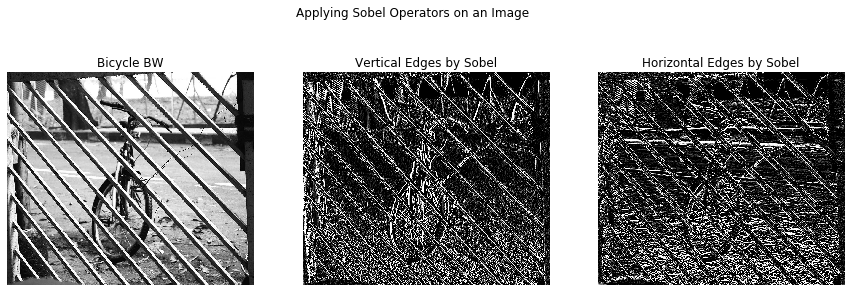

In [14]:
# Sobel Operator

sobelx = np.array([[-1, 0, 1], [-10, 0, 10],[-1, 0, 1]])
sobely = np.array([[-1, -10, -1], [0, 0, 0],[1, 10, 1]])
vertical_edge = cv2.filter2D(img_bw, -1, sobelx)
horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

utils.showImage([img_bw, vertical_edge, horizontal_edge], ['Bicycle BW', 'Vertical Edges by Sobel', 'Horizontal Edges by Sobel'],
                'Applying Sobel Operators on an Image')

**Practical Tip**: As shown above, edge detection operators can also pick up a lot of noise from the image. Hence it is advisable to smooth the image before applying these differntial based operators on your images.

## But How is Edge Detection "Applied"?

Edge detection by these filters are pretty old techniques. They are good to know for a conceptual understanding of image processing techniques, but is there any practical utility in using them. Let's look at a small and simple activity to understand the utility of this basic technique. 

In the following activity we take images of a pack of tablets and figure out which tablets are defective

In [15]:
# Importing Libraries

import requests
from PIL import Image
from io import BytesIO

In [16]:
# Reading an image of a medical tablet pack

response = requests.get('https://i.stack.imgur.com/ukOkD.jpg')
img = np.asarray(Image.open(BytesIO(response.content)))
img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

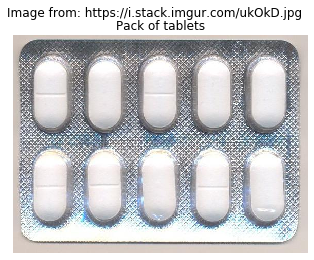

In [17]:
utils.showImage([img], ['Pack of tablets'], 'Image from: https://i.stack.imgur.com/ukOkD.jpg')

### Problem Statement

The image above shows a pack of tablets. As you can see the pack contains white tablets. A peculiar feature of these tablets is a line marked in their center. A horizontal line. However this line is not present in all the tablets. Let's call this as a **defect**.

Can we detect these defects using what we have learned just now? Let's test our skills.

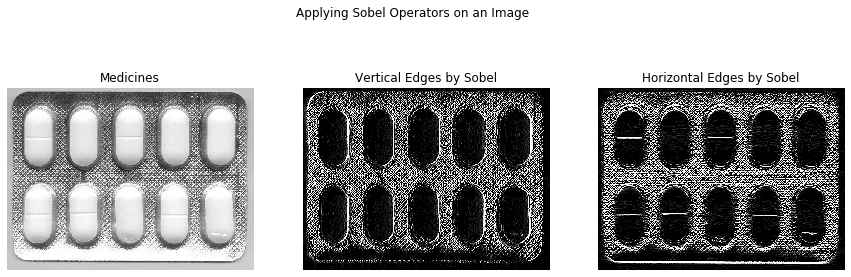

In [18]:
# Sobel Operator

# img_bw = cv2.GaussianBlur(img_bw, (3, 3), 3)
sobelx = np.array([[1, 0, -1], [10, 0, -10],[1, 0, -1]])
sobely = np.array([[-1, -10, -1], [0, 0, 0],[1, 10, 1]])

vertical_edge = cv2.filter2D(img_bw, -1, sobelx)
horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

utils.showImage([img_bw, vertical_edge, horizontal_edge], ['Medicines', 'Vertical Edges by Sobel', 'Horizontal Edges by Sobel'],
                'Applying Sobel Operators on an Image')

#### Observations

- Using the horizontal edge detector we are easily able to detect the horizontal marks on the tablets.
- Using the vertical edge detector we are able to mark the areas where the tablers are present.

#### Problem

- How can we isolate the tablet area from the packing area to flag out indicvidual tablet?
- Applying edge detector (differential) filters on the image have resulted into noisy image because the image contains lot of high frequency variation of black and white intensity in between the tablets.

#### Solution

- We will use a technique called as "segmentation" to extract the tablet area and then use edge detection to identify individual tablets.

Let's see this in action

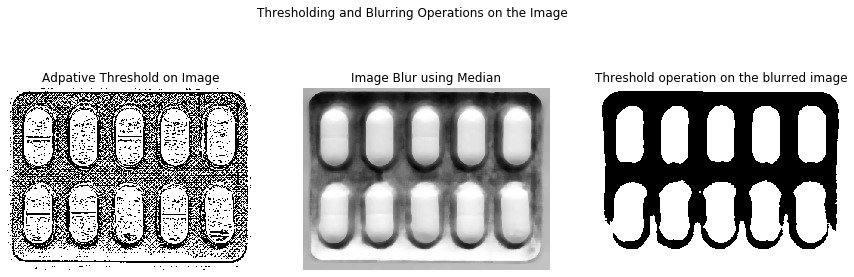

In [19]:
img_adth = cv2.adaptiveThreshold(img_bw,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
img_blur = cv2.medianBlur(img_bw, 11)
ret, img_blr_th = cv2.threshold(img_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

utils.showImage([img_adth, img_blur, img_blr_th], ['Adpative Threshold on Image', 
                                                   'Image Blur using Median', 'Threshold operation on the blurred image'], 
                'Thresholding and Blurring Operations on the Image')

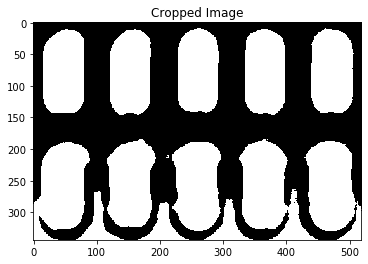

In [20]:
plt.imshow(img_blr_th[30:-50, 25:-30], cmap = 'gray')
plt.title('Cropped Image')
plt.show()

### Calculting Contours and Creating Bouding Box around the blobs detected

**Read**: https://docs.opencv.org/3.4/da/d0c/tutorial_bounding_rects_circles.html

In [21]:
img_cropped = img_blr_th[30:-50, 25:-30]
img_ = img.copy()

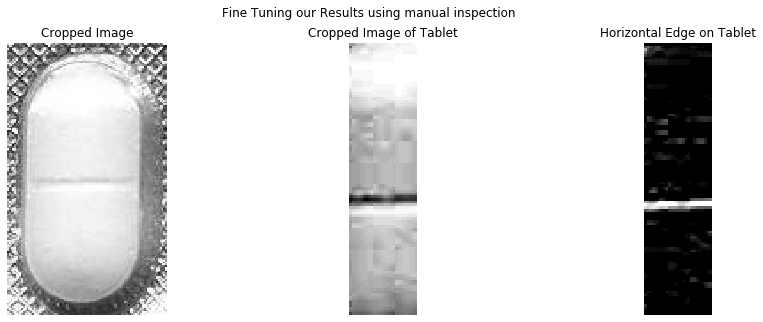

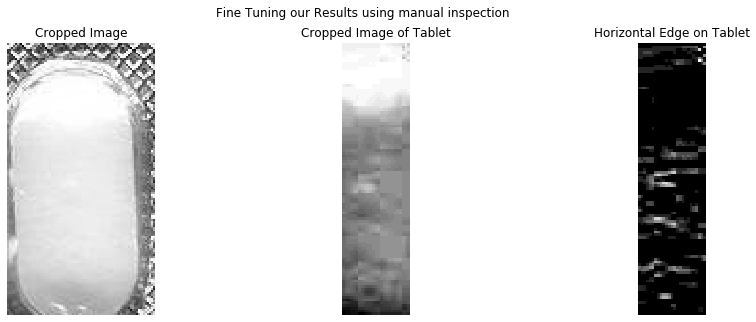

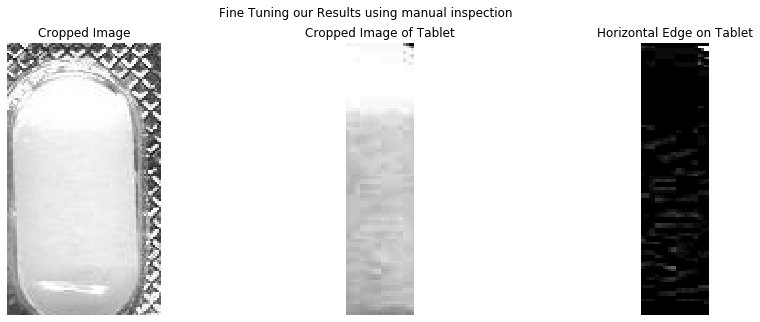

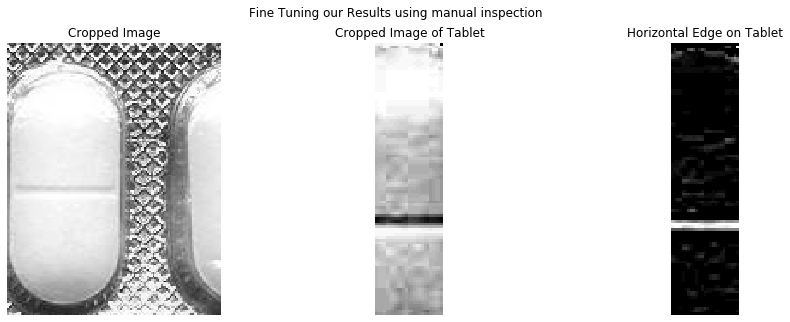

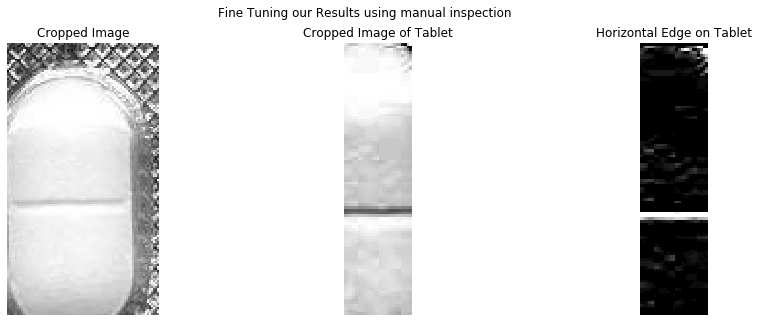

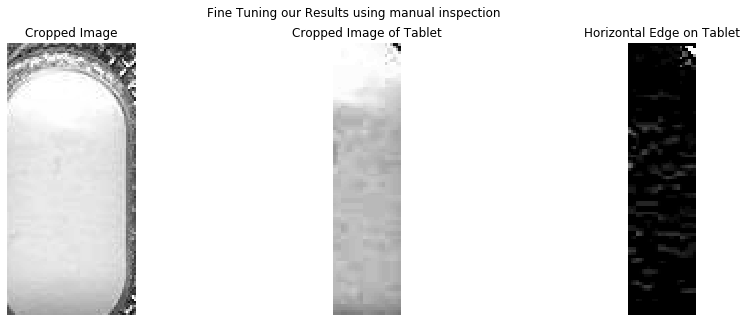

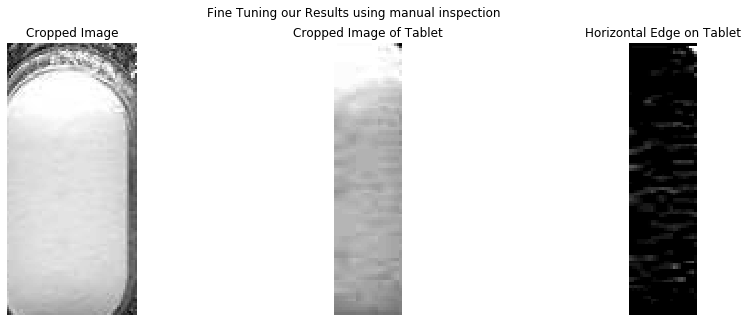

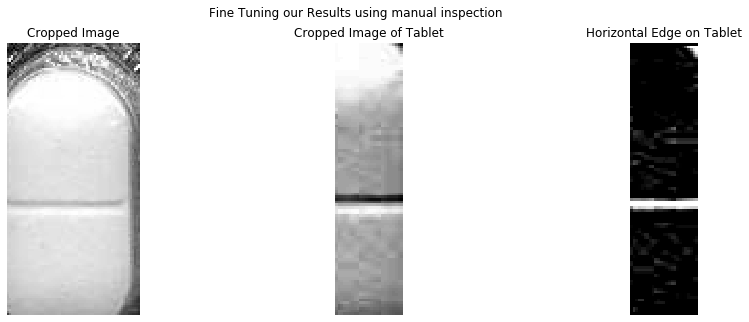

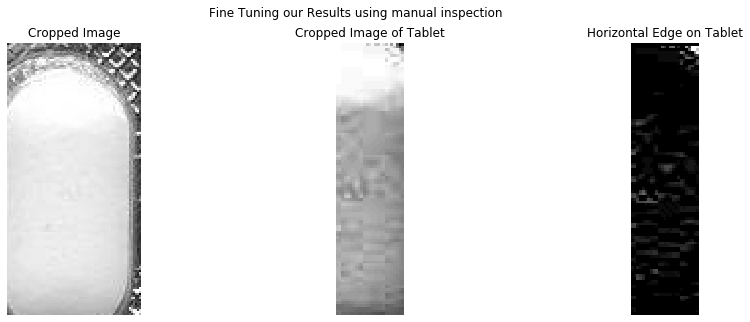

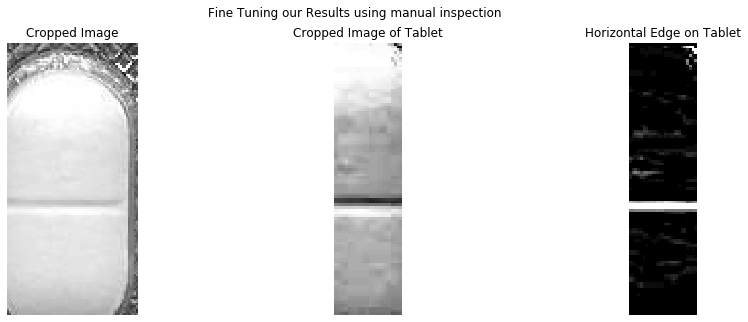

In [25]:
contours, _ = cv2.findContours(img_cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
edge_averages = []
for i, contour in enumerate(contours):
    c_area = cv2.contourArea(contour)
    if c_area > 2000:
        contours_poly = cv2.approxPolyDP(contour, 3, True)
        boundRect = cv2.boundingRect(contours_poly)
        crop = img_bw[int(boundRect[1])+25:int(boundRect[1]+boundRect[3])+25, 
                           int(boundRect[0])+30:int(boundRect[0]+boundRect[2])+30]
        crop_ = crop[20:120, 25:50]
        mark = cv2.filter2D(crop_, -1, sobely)
        mark_avg = np.mean(mark)
        edge_averages.append(mark_avg)
        
        utils.showImage([crop, crop_, mark], ['Cropped Image', 'Cropped Image of Tablet', 'Horizontal Edge on Tablet'], 
                        'Fine Tuning our Results using manual inspection')
        
        if mark_avg > 10:
            cv2.rectangle(img_, (int(boundRect[0])+30, int(boundRect[1])+30), \
              (int(boundRect[0]+boundRect[2])+25, int(boundRect[1]+boundRect[3])+25), [0, 255, 0], 2)
        else:
            cv2.rectangle(img_, (int(boundRect[0])+30, int(boundRect[1])+30), \
              (int(boundRect[0]+boundRect[2])+25, int(boundRect[1]+boundRect[3])+25), [255, 0, 0], 2)

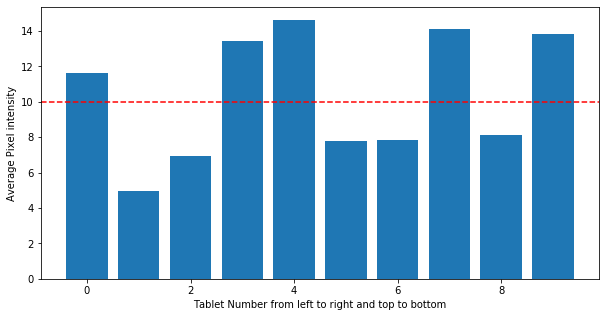

In [37]:
f, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.bar(height = edge_averages, x = np.arange(len(edge_averages)))
ax.axhline(y = 10, color='r', linestyle='--')

plt.ylabel('Average Pixel intensity')
plt.xlabel('Tablet Number from left to right and top to bottom')
plt.show()

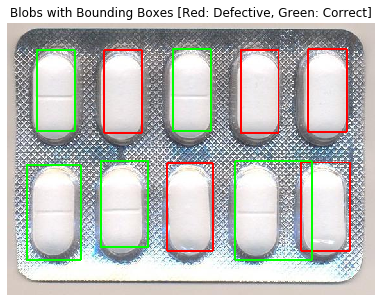

In [40]:
f, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.imshow(img_, cmap = 'gray')
ax.set_title('Blobs with Bounding Boxes [Red: Defective, Green: Correct]')
plt.axis('off')
plt.show()

## Interesting Reads

- [Edge Detection - Machine Vision](https://www.cse.usf.edu/~r1k/MachineVisionBook/MachineVision.files/MachineVision_Chapter5.pdf)